# Shopify Fall 2021 Data Science Intern Challenge
Author: Zhi Zhang

## Question 1 

In [2]:
import pandas as pd 
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# load the data
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [4]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
# double check the created_at value, make sure the data is over a 30 day window
min(df['created_at']), max(df['created_at'])

('2017-03-01 0:08:09', '2017-03-30 9:55:00')

In [6]:
df['order_amount'].mean()

3145.128

## Question 1a: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

## Answer: 
When we directly calculate the average of the 'order_amount', the AOV is $3145.128. 

To figure out the what is causing this unusual result, I will explore a bit on the 'order_amount' column. Here are the steps I took to explore the data and came up with a better way to evaluate teh AOV:

In [7]:
# check the minimum and maximum of 'order_amount'. The minimum order values looks reasonable, but the maximum order value is unusual.
print('minimum order amount: ', min(df['order_amount']))
print('maximun order amount: ', max(df['order_amount']))

minimum order amount:  90
maximun order amount:  704000


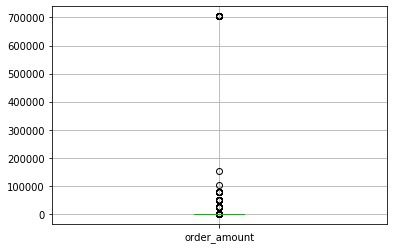

In [8]:
# make a box plot to see the outliers
df.boxplot(column = ['order_amount'])

In [9]:
# filter out the outliers(the orders with high order_amount)
def outliers(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    fence_high = q3+1.5*iqr 
    outliers = df.loc[(df[column_name] > fence_high)]
    return outliers
outliers(df,'order_amount')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
99,100,18,752,780,5,cash,2017-03-06 23:41:16
136,137,15,961,765,5,credit_card,2017-03-26 5:06:46
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
...,...,...,...,...,...,...,...
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46
4927,4928,74,849,765,5,cash,2017-03-28 6:55:57
4952,4953,26,786,880,5,cash,2017-03-17 1:50:18
4958,4959,70,711,865,5,credit_card,2017-03-08 17:22:51


Some data(order_id 100, 137,4928,etc.) still look reasonable, so we check on the data where the order_amount is more extreme.

In [13]:
q = df['order_amount'].quantile(0.99)
q

25725.0

In [12]:
outliers = df[df['order_amount']>q]
outliers.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14


All extreme data are from shop_id 42 and shop_id 78, let's first take a look at shop 42.

User_id 607 placed 17 orders at shop_id 42 in 30 days, all orders were created exactly at 4:00:00, with exactly 2000 items, and an order_amount of 704000. These don't look like valid transactions.

In [15]:
outliers[outliers['shop_id']==42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


Then we take a look at shop_id 78. Even though shop 78 has large order_amount, orders are created at various time and by different users, when we look at all orders from the store, we can see that all their products have high price. This makes their high order_amount look reasonable, but we should still check their website to see what they sale to make sure these orders are valid. 

In [16]:
outliers[outliers['shop_id']==78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
1529,1530,78,810,51450,2,cash,2017-03-29 7:12:01
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
2495,2496,78,707,51450,2,cash,2017-03-26 4:38:52


In [17]:
df[df['shop_id']==78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


### Better way to calculate the average order_amount:
From the analysis I think we should exclude the orders where shop_id = 42 and user_id = 607. So I created a cleaned_df to exclude them, and calculated the new average order value(AOV) to be $754.79. 

Considering the average price of regular sneakers, I further excluded orders where shop_id = 78, and calculated another AVO of $300.16.

In [19]:
filter = (df['shop_id']!= 42) & (df['user_id']!= 607)

In [29]:
cleaned_df = df[filter]

In [30]:
cleaned_df['order_amount'].mean()

754.7916750858759

In [31]:
filter2 = (cleaned_df['shop_id']!= 78)
cleaned_df2 = cleaned_df[filter2]
cleaned_df2['order_amount'].mean()

300.1558229655313

## Question 1b. What metric would you report for this dataset?

## Answer 1b: There are 4 metrics I would report for this dataset:
<ol>
  <li>The average number of orders per user.</li>
  <li>The average number of items sold per order.</li>
  <li> The average price of a pair of shoes on Shopify. </li>
  <li> The usage of each payment_method. </li>
</ol>

## Question 1c. What is its value?
I'm using the cleaned_df to calculate the values. 
## Answer 1c:  
<ol>
  <li>The average number of orders per user: </li>
  <p> 16  </p>
  <li>The average number of items sold per order:</li>
  <p> 2 </p>
  <li> The average price of a pair of shoes on Shopify: </li>
  <p> 408  </p>
  <li>The usage of each payment_method. </li>
  <p> credit_card    0.345120  </p>
  <p> debit          0.334613  </p>
  <p> cash           0.320267  </p>
  
</ol>

In [33]:
# 1. The average number of orders per user.
cleaned_df.user_id.value_counts().mean()

16.496666666666666

In [36]:
# 2. The average number of items sold per order.
cleaned_df['total_items'].mean()

1.9949484744392807

In [71]:
# 3. The average price of a pair of shoes 
# Since the shops sells only one model of shoe, using the order_amount/total_items we are able to get the price of shoes at each shop, then we can calculate the average price of shoes from the 100 shops
cleaned_df['price'] = cleaned_df['order_amount']/cleaned_df['total_items']
shop_price = cleaned_df[['shop_id','price']].groupby('shop_id').agg('mean')
shop['price'].mean()

408.55555555555554

In [66]:
# 4. The usage of each payment_method.
cleaned_df['payment_method'].value_counts()/len(cleaned_df['payment_method'])

credit_card    0.345120
debit          0.334613
cash           0.320267
Name: payment_method, dtype: float64

## Question 2 

### a. How many orders were shipped by Speedy Express in total?

### answer: 54 orders were shipped by Speedy Express in total. 
### SQL query:
```SQL
SELECT Count(orderid)
FROM   orders
WHERE  shipperid = (SELECT shipperid
                    FROM   shippers
                    WHERE  shippername = 'Speedy Express') 
```

### b. What is the last name of the employee with the most orders?

### answer: The last name of the employee with the most orders is Peacock.
### SQL query:
```SQL
SELECT lastname
FROM   employees
WHERE  employeeid = (SELECT employeeid
                     FROM   orders
                     GROUP  BY employeeid
                     ORDER  BY Count(employeeid) DESC
                     LIMIT  1) 
```

### c. What product was ordered the most by customers in Germany?

### answer: The product named Gorgonzola Telino with Product ID 31 was ordered the most by customers in Germany .
### SQL query:
```SQL
SELECT *
FROM   products
WHERE  productid = (SELECT productid
                    FROM   orderdetails
                    WHERE  orderid IN (SELECT orderid
                                       FROM   orders o
                                              INNER JOIN customers c
                                                      ON o.customerid =
                                                         c.customerid
                                                         AND
                                              c.country = 'Germany')
                    GROUP  BY productid
                    ORDER  BY Count(*) DESC
                    LIMIT  1) 


```